# Introdução a Séries Temporais

Tutorial for improve skills: 'Séries Temporais com python/pandas/statsmodels - Parte 01' (ORMaster) by Marcus Mariano

**For more information about Marcus Mariano: [Web site](https://marcusmariano.github.io/mmariano/)**  

**Séries Temporais com python/pandas/statsmodels - Parte 01 [ORMaster.](https://www.youtube.com/playlist?list=PL5fQ3JoS0SZscDaHgXahtx632NMnq5RR-)** 

# Introdução a séries temporais

Uma série temporal é definida como um conjunto de valores que se modificam em intervalos iguais de tempo.

Exemplo de séries temporais:
* Valor de ativos na bolsa de valores
* População de um país
* Demanda por um determinado produto

Os modelos utilizados para descrever séries temporais são processos estocásticos, isto é, processos controlados por leis probabilísticas. 

Temos na literatura um número muito grande de modelos diferentes para descrever o comportamento de uma série particular. A construção destes modelos depende de vários fatores, tais como o comportamento do fenômeno ou o conhecimento apriori que temos de sua natureza e do objetivo da análise. O pacote ```pandas``` possui um conjunto de funcinalidades que auxiliam na análise de séries temporais. Para apresentar essas funcionalidades, utilizaremos os dados contidos no arquivo ```timeline.csv``` representando os _trending toṕics_ de pesquisas na internet.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from plotly import express as px
from plotly import graph_objects as go

from tqdm.notebook import tqdm

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\marcus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('data/timeline.csv')
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


Nesse exemplo temos três tópicos de pesquisa com estatística de pesquisa coletada mensalmente.

## Trabalhando com datas

Executando o comando ```DataFrame.info()``` é possível observar que a coluna ```month``` foi interpretada como tipo ```object```.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


O primeiro passo para a análise de séries temporais é a conversão da coluna ```month``` para o tipo especial ```datetime```. Para tanto, utilizaremos a função ```pd.to_datetime()```.

In [4]:
df.month = pd.to_datetime(df.month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


Em seguida, transformaremos a coluna ```month``` como a coluna indexadora dos demais utilizando o comando ```DataFrame.set_index()```. 

In [5]:
df.set_index('month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


O efeito dessa transformação é a criação de um novo index do tipo ```DatetimeIndex```.

In [6]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## Plotando séries temporais
Inicialmente faremos a plotagem dos três trendding topics. Para plotar todos os dados utilizando em um único gráfico utilizamos o comando ```DataFrame.plot()```. Para modificar o tamanho do gráfico, passamos o parâmetro ```figsize=(15, 6)```, aumentando a largura e altura do gráfico para 15 e 6, respectivamente. A lista completa de parâmetros encontra-se na documentação disponível no link https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html. 

Text(0.5, 0, 'Data')

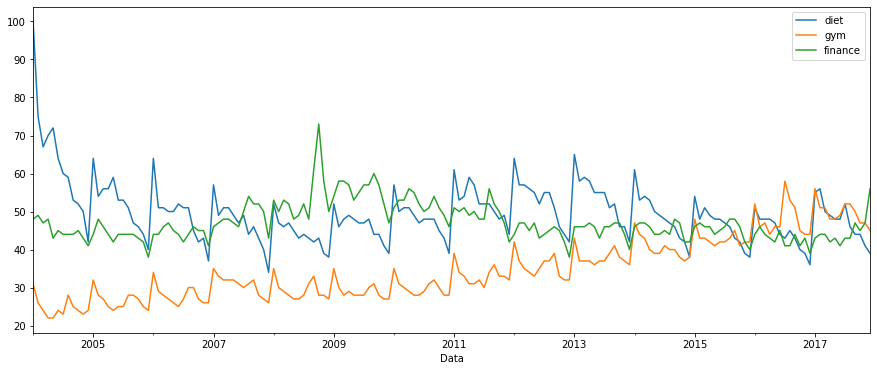

In [7]:
df.plot(figsize=(15, 6))
plt.xlabel('Data')

In [8]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['diet'], name='Diet', 
              line = dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=df.index, y=df['gym'], name='Gym',
              line = dict(color='red', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['finance'], name='Finance',
              line = dict(color='green', width=1)))

fig.update_layout(title='Diet Gym Finance by year',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                  height=500, 
                  width=800)
fig

Observamos três comportamentos distintos. Aparetemente, a frequência de pesquisas sobre dieta teve uma diminuição desde o início de 2004 até o final de 2017. Já a frequência de pesquisas sobre academia aparenta ter subido durante o mesmo intervalo de tempo. As pequisas sobre finanças se manteram aparentemente estáveis durante durante os 13 anos.

## Analisando tendências
Faremos a análise somente das pesquisas sobre dieta. Observe que, por conta da ocilação das pesquisas, fica difícil de confirmar qualquer tipo de tendência na frequência de pesquisa. Essas ocilações podem ser provocadas pela sazonalidade das pesquisas ou pela variabilidade natural da mesma.

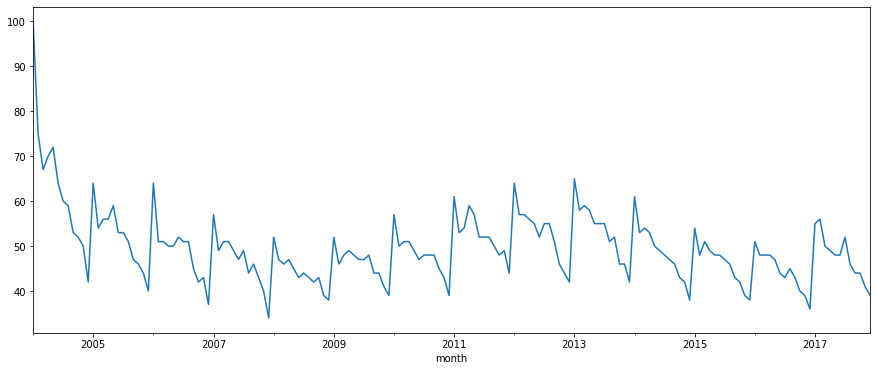

In [9]:
df.diet.plot(figsize=(15, 6))

In [10]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['diet'], name='Diet', 
              line = dict(color='blue', width=1)))

fig.update_layout(title='Tendencies',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                  height=500, 
                  width=800)
fig

### Média móvel simples (MMS)
Uma das técnicas comuns para eliminação do ruído é a aplicação das médias móveis (em inglês rolling averages). 

Considere a série temporal $Z_1, Z_2, \ldots, Z_n$.
A técnica da média móvel consiste em calcular a média aritmética das $k$ observações mais recentes, ou seja

$$M_t = \frac{Z_t, Z_{t-1}, \ldots, Z_{t-k+1}}{k}$$

Detonamos por $k$ como sendo o comprimento da média.

Para plotar as médias móveis para 12 períodos, utilizamos o comando ```Series.rolling(numero_de_periodos).mean().plot()```.

In [11]:
df.diet.rolling(12).mean()

month
2004-01-01          NaN
2004-02-01          NaN
2004-03-01          NaN
2004-04-01          NaN
2004-05-01          NaN
                ...    
2017-08-01    46.833333
2017-09-01    46.916667
2017-10-01    47.250000
2017-11-01    47.416667
2017-12-01    47.666667
Name: diet, Length: 168, dtype: float64

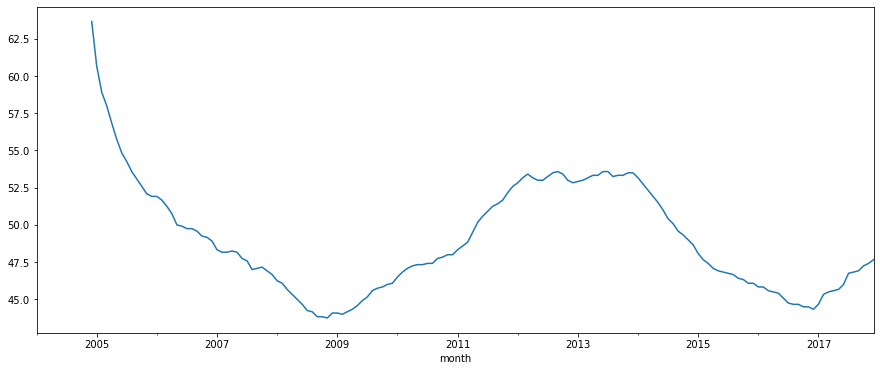

In [12]:
df.diet.rolling(12).mean().plot(figsize=(15, 6))

In [13]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['diet'].rolling(12).mean(), 
                         name='Diet', 
              line = dict(color='blue', width=1)))

fig.update_layout(title='Simple moving average (SMA)',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                  height=500, 
                  width=800)
fig

Analisando o gráfico das médias móveis é possível observar com mais clareza que a pesquisa sobre dieta estava em alta no início de 2004 e sofreu queda até o fina de 2008. De 2009 até 2012 teve mais um crescimento ficando estável até 2014, onde sofreu mais uma queda até 2017.

In [50]:
df.diet.groupby(df.index.year).sum()

month
2004    764
2005    623
2006    587
2007    560
2008    529
2009    553
2010    576
2011    631
2012    634
2013    642
2014    584
2015    553
2016    532
2017    572
Name: diet, dtype: int64

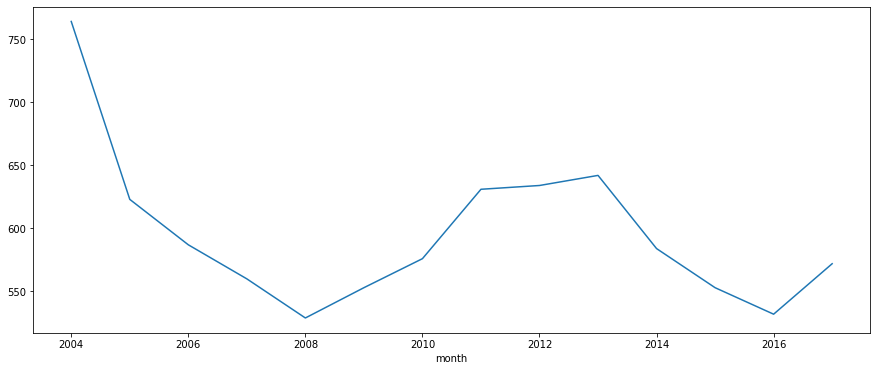

In [14]:
df.diet.groupby(df.index.year).sum().plot(figsize=(15, 6))

In [15]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['diet'].groupby(df.index.year).sum(), 
                         name='Diet', 
              line = dict(color='blue', width=1)))

fig.update_layout(title='Simple moving average (SMA)',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                  height=500, 
                  width=800)
fig

## Analisando sazonalidade
Ao contrário da análise de tendência, para analisar a sazonalidade das pesquisas sobre dieta, precisaremos eliminar a tendência. Para tanto utilizamos o conceito de diferenças.
### Diferenças
O procedimento utilizado para eliminar a tendência é conhecido na literatura como procedimento para transformação de uma série não estacionária em uma série estacionária. 

A transformação mais comum consiste em tomar diferenças sucessivas da série originalm até se obter uma série estacionária. A primeira diferença $Z(t)$ é definida por

$$\Delta Z(t) = Z(t) - Z(t-1)$$

então a segunda diferença é,

$$\Delta^2 Z(t)=\Delta[\Delta Z(t)]=\Delta[Z(t) - Z(t - 1)]$$
$$\Delta^2 Z(t)=Z(t) - 2 Z(t - 1) + Z(t -2)$$

De modo geral, a n-ésima diferença de $Z(t)$ é

$$\Delta^n Z(t) = \Delta[\Delta^{n - 1}Z(t)]$$

Normalmente, será necessária somente uma ou duas diferenças para que a série se torne estacionária.

Para plotar as $n$ diferenças, utilizamos o comando ```Series.diff(numero_de_periodos)```.

In [16]:
df.diet.diff(1)

month
2004-01-01     NaN
2004-02-01   -25.0
2004-03-01    -8.0
2004-04-01     3.0
2004-05-01     2.0
              ... 
2017-08-01    -6.0
2017-09-01    -2.0
2017-10-01     0.0
2017-11-01    -3.0
2017-12-01    -2.0
Name: diet, Length: 168, dtype: float64

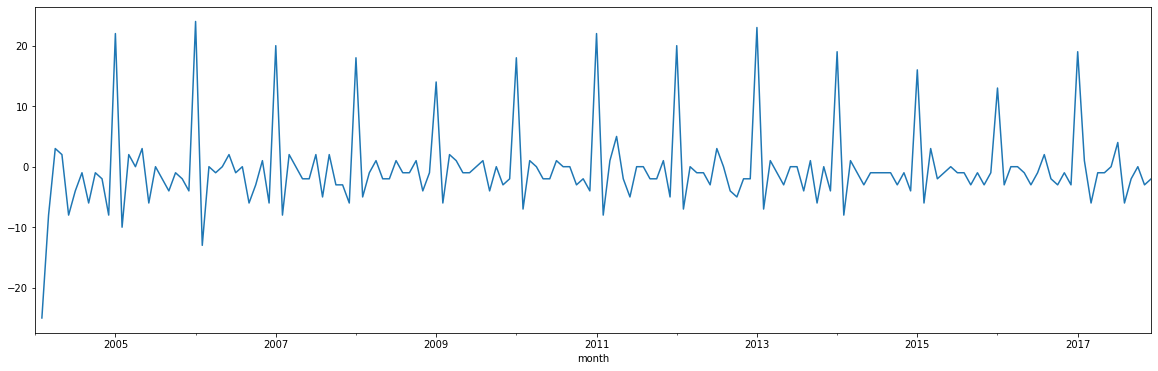

In [17]:
df.diet.diff(1).plot(figsize=(20, 6))

In [18]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['diet'].diff(1), 
                         name='Diet', 
              line = dict(color='blue', width=1)))

fig.update_layout(title='Seasonality',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                   height=500, 
                   width=800)
fig

Para o caso estudado, somente uma diferença foi suficiente para tornar a série estacionária.

Obervando o gráfico acima é possível perceber "picos" e "vales" recorrrentes. Para melhorar a visualização, filtraremos os dados de 2005-01 até 2007-12.

In [19]:
intervalo = (df.index.year >= 2005) & (df.index.year < 2008) 
df.diet[intervalo].diff()

month
2005-01-01     NaN
2005-02-01   -10.0
2005-03-01     2.0
2005-04-01     0.0
2005-05-01     3.0
2005-06-01    -6.0
2005-07-01     0.0
2005-08-01    -2.0
2005-09-01    -4.0
2005-10-01    -1.0
2005-11-01    -2.0
2005-12-01    -4.0
2006-01-01    24.0
2006-02-01   -13.0
2006-03-01     0.0
2006-04-01    -1.0
2006-05-01     0.0
2006-06-01     2.0
2006-07-01    -1.0
2006-08-01     0.0
2006-09-01    -6.0
2006-10-01    -3.0
2006-11-01     1.0
2006-12-01    -6.0
2007-01-01    20.0
2007-02-01    -8.0
2007-03-01     2.0
2007-04-01     0.0
2007-05-01    -2.0
2007-06-01    -2.0
2007-07-01     2.0
2007-08-01    -5.0
2007-09-01     2.0
2007-10-01    -3.0
2007-11-01    -3.0
2007-12-01    -6.0
Name: diet, dtype: float64

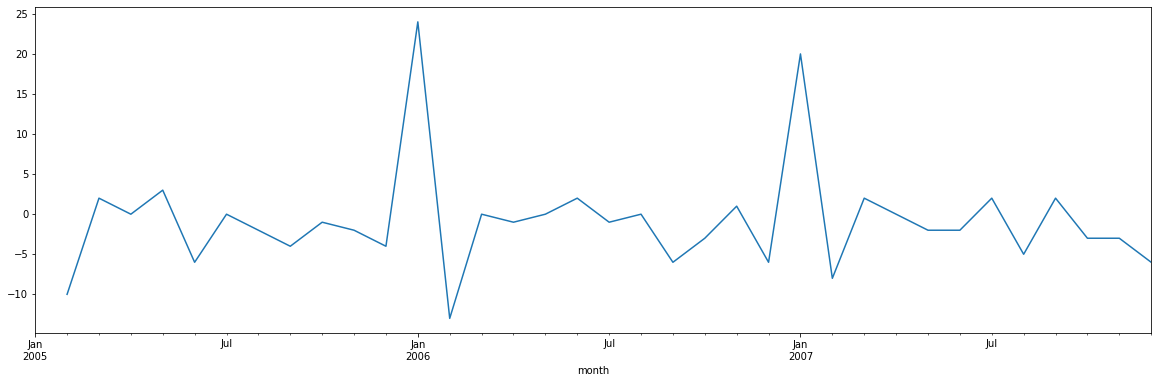

In [20]:
intervalo = (df.index.year >= 2005) & (df.index.year < 2008) 
df.diet[intervalo].diff().plot(figsize=(20, 6))

In [21]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['diet'][intervalo].diff(), 
                         name='Diet', 
              line = dict(color='blue', width=1)))

fig.update_layout(title='Seasonality',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                  height=500, 
                  width=800)
fig

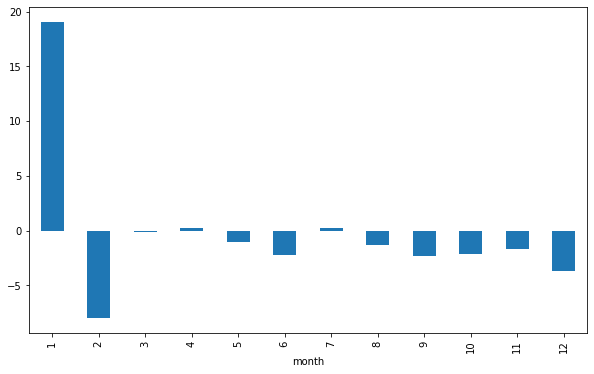

In [22]:
df.diet.diff(1).groupby(df.index.month).mean().plot(kind='bar', figsize=(10, 6))

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index, 
                     y=df['diet'].diff(1).groupby(df.index.month).mean(), 
                     name='Diet', 
                     
                     marker_color='indianred'))

fig.update_layout(title='Seasonality',
                   xaxis_title='Years',
                   yaxis_title='Counts', 
                  height=500, 
                  width=800)
fig

A partir do gráfico acima percebe-se um padrão de comportamento sazonal, onde em janeiro existe um pico nas pesquisas sobre dieta seguido de uma queda brusca em fevereiro. Durante o restante do ano as pesquisas se mantêm estáveis.